In [44]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
import matplotlib.pyplot as plt
%matplotlib inline


X_train = pd.read_csv('./data/nba/X_train.csv')
y_train = pd.read_csv('./data/nba/y_train.csv')

X_test = pd.read_csv('./data/nba/X_test.csv')


print(X_train.shape)
print(X_train.columns)
print(y_train.columns)

print(X_train[:4])
print(y_train[:4])


forest = RandomForestClassifier(criterion='entropy',
                                n_estimators=200, 
                                random_state=1,
                                n_jobs=2)


forest.fit(X_train, y_train)

importances = forest.feature_importances_
# get sort indices in descending order
indices = np.argsort(importances)[::-1]

#print(indices)

X_train_select_forest = X_train.ix[:,[1,5,2]]

#print(X_train_select_forest)


X_train_forest, X_valid_forest, y_train_forest, y_valid_forest = train_test_split(
        X_train_select_forest, y_train, test_size=0.3, random_state=0)



def pd2np(df):
    return df.as_matrix()
X_train = pd2np(X_train)
y_train = pd2np(y_train)

X_test = pd2np(X_test)

print(type(X_train))
print(X_train.shape)


sc = StandardScaler()
sc.fit(X_train)
X_train = sc.transform(X_train)
X_test = sc.transform(X_test)


X_train, X_valid, y_train, y_valid = train_test_split(
        X_train, y_train, test_size=0.3, random_state=0)


(52399, 8)
Index(['PERIOD', 'GAME_CLOCK', 'SHOT_CLOCK', 'DRIBBLES', 'TOUCH_TIME',
       'SHOT_DIST', 'PTS_TYPE', 'CLOSE_DEF_DIST'],
      dtype='object')
Index(['FGM'], dtype='object')
   PERIOD  GAME_CLOCK  SHOT_CLOCK  DRIBBLES  TOUCH_TIME  SHOT_DIST  PTS_TYPE  \
0       2         557        15.5         0         0.7        2.1         2   
1       2         151        20.1         0         0.8        2.7         2   
2       3         448        14.2         0         0.8        5.1         2   
3       1         279        10.6         0         0.6        1.9         2   

   CLOSE_DEF_DIST  
0             0.0  
1             3.4  
2             0.1  
3             2.7  
   FGM
0    1
1    1
2    0
3    1


c:\python37\lib\site-packages\ipykernel_launcher.py:31: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


<class 'numpy.ndarray'>
(52399, 8)


c:\python37\lib\site-packages\ipykernel_launcher.py:39: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
c:\python37\lib\site-packages\ipykernel_launcher.py:50: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.


In [45]:
#RandomForestClassifier 

from sklearn.metrics import accuracy_score

forest = RandomForestClassifier(criterion='entropy',
                                n_estimators=200, 
                                random_state=1,
                                n_jobs=2)


forest.fit(X_train_forest, y_train)

y_train_pred = forest.predict(X_train_forest)
y_valid_pred = forest.predict(X_valid_forest)



print('Train Accuracy (forest): %f' % accuracy_score(y_train, y_train_pred))
print('Valid Accuracy (forest): %f' % accuracy_score(y_valid, y_valid_pred))


c:\python37\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  # This is added back by InteractiveShellApp.init_path()


Train Accuracy (forest): 0.998092
Valid Accuracy (forest): 0.561896


In [46]:
def get_accuracy(X, Y):
    Y = Y>0.5
    return np.average(X==Y)

In [47]:
# LinearRegression did'nt select feature
from sklearn.linear_model import LinearRegression
regr = LinearRegression()
regr.fit(X_train, y_train)
y_train_pred_lire = regr.predict(X_train)
y_valid_pred_lire = regr.predict(X_valid)

print('Training: %f' % (get_accuracy(y_train,y_train_pred_lire)))
print('valid_acc: %f' % (get_accuracy(y_valid, y_valid_pred_lire)))

Training: 0.605142
valid_acc: 0.612850


In [48]:
#LASSO did'nt select feature
from sklearn.linear_model import Lasso
for a in [0, 1, 10, 100, 1000]:
    lr_rg = Lasso(alpha=1)
    lr_rg.fit(X_train, y_train)

    y_train_pred_lasso = lr_rg.predict(X_train)
    y_valid_pred_lasso = lr_rg.predict(X_valid)
    print('\n[Alpha = %d]' % a )
    print('Training: %f' % (get_accuracy(y_train,y_train_pred_lasso)))
    print('valid_acc: %f' % (get_accuracy(y_valid, y_valid_pred_lasso)))


[Alpha = 0]
Training: 0.544344
valid_acc: 0.542303

[Alpha = 1]
Training: 0.544344
valid_acc: 0.542303

[Alpha = 10]
Training: 0.544344
valid_acc: 0.542303

[Alpha = 100]
Training: 0.544344
valid_acc: 0.542303

[Alpha = 1000]
Training: 0.544344
valid_acc: 0.542303


In [49]:
#Ridge did'nt select feature
from sklearn.linear_model import Ridge
for a in [0, 1, 10, 100, 1000]:
    lr_Ridge = Ridge(alpha=a)
    lr_Ridge.fit(X_train, y_train)

    y_train_pred_Ridge = lr_Ridge.predict(X_train)
    y_test_pred_Ridge = lr_Ridge.predict(X_valid)
    print('\n[Alpha = %d]' % a )
    print('Training: %f' % (get_accuracy(y_train,y_train_pred_Ridge)))
    print('valid_acc: %f' % (get_accuracy(y_valid, y_test_pred_Ridge)))


[Alpha = 0]
Training: 0.605142
valid_acc: 0.612850

[Alpha = 1]
Training: 0.605115
valid_acc: 0.612850

[Alpha = 10]
Training: 0.605142
valid_acc: 0.612913

[Alpha = 100]
Training: 0.605333
valid_acc: 0.612850

[Alpha = 1000]
Training: 0.606205
valid_acc: 0.612723


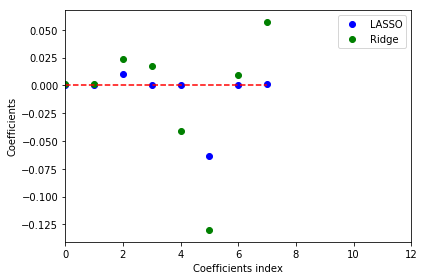

(array([2, 5, 7], dtype=int64),)


In [50]:
var_num = X_train.shape[1]

lr_lasso = Lasso(alpha = 0.03)
lr_lasso.fit(X_train, y_train)
lr_ridge = Ridge(alpha = 0.03)
lr_ridge.fit(X_train, y_train)

plt.scatter(range(var_num),lr_lasso.coef_, label = 'LASSO', color = 'blue')
plt.scatter(range(var_num),lr_ridge.coef_, label = 'Ridge', color = 'green')
plt.hlines(y=0, xmin=0, xmax=var_num-1, color='red', linestyle ='--')
plt.xlim(0,12)
plt.legend(loc = 'upper right')
plt.xlabel('Coefficients index')
plt.ylabel('Coefficients')
plt.tight_layout()
plt.show()

epsilon = 1e-20
idxs = np.where(abs(lr_lasso.coef_) > epsilon)
print(idxs)

In [51]:
X_train = pd.read_csv('./data/nba/X_train.csv')
y_train = pd.read_csv('./data/nba/y_train.csv')

X_test = pd.read_csv('./data/nba/X_test.csv')

def pd2np(df):
    return df.as_matrix()
X_train = pd2np(X_train)
y_train = pd2np(y_train)

X_test = pd2np(X_test)

X_train_select = X_train[:,idxs[0]]



c:\python37\lib\site-packages\ipykernel_launcher.py:7: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  import sys


In [52]:
X_train_split, X_valid, y_train_split, y_valid = train_test_split(
        X_train_select, y_train, test_size=0.3, random_state=0)

poly = PolynomialFeatures(degree=3)
poly.fit(X_train_split)
X_train_poly = poly.transform(X_train_split)
X_test_poly = poly.transform(X_valid)



sc = StandardScaler()
sc.fit(X_train_poly)
X_train_std = sc.transform(X_train_poly)
X_valid = sc.transform(X_test_poly)

In [53]:
# LinearRegression select feature
from sklearn.linear_model import LinearRegression
regr = LinearRegression()
regr.fit(X_train_std, y_train_split)
y_train_pred_lire = regr.predict(X_train_std)
y_valid_pred_lire = regr.predict(X_valid)

print('Training: %f' % (get_accuracy(y_train_split,y_train_pred_lire)))
print('valid_acc: %f' % (get_accuracy(y_valid, y_valid_pred_lire)))

Training: 0.614684
valid_acc: 0.620420


In [54]:
#LASSO select feature

lr_rg = Lasso(alpha=1)
lr_rg.fit(X_train_std, y_train_split)

y_train_pred_lasso = lr_rg.predict(X_train_std)
y_valid_pred_lasso = lr_rg.predict(X_valid)

print('Training: %f' % (get_accuracy(y_train_split,y_train_pred_lasso)))
print('valid_acc: %f' % (get_accuracy(y_valid, y_valid_pred_lasso)))

Training: 0.544344
valid_acc: 0.542303


In [55]:
#Ridge select feature

lr_Ridge = Ridge(alpha=10)
lr_Ridge.fit(X_train_std, y_train_split)

y_train_pred_Ridge = lr_Ridge.predict(X_train_std)
y_test_pred_Ridge = lr_Ridge.predict(X_valid)

print('Training: %f' % (get_accuracy(y_train_split,y_train_pred_Ridge)))
print('valid_acc: %f' % (get_accuracy(y_valid, y_test_pred_Ridge)))

Training: 0.614003
valid_acc: 0.621247


In [56]:
def ACC(model, X, y):
    return get_accuracy(y,model.predict(X))

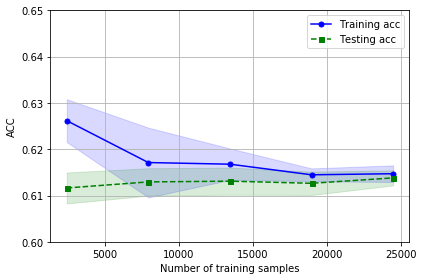

In [59]:
from sklearn.learning_curve import learning_curve




train_sizes, train_scores, test_scores = learning_curve(estimator=lr_Ridge, X=X_train_std, y=y_train_split,scoring=ACC)
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.plot(train_sizes, train_mean,
    color='blue', marker='o',
    markersize=5,
    label='Training acc')
plt.fill_between(train_sizes,
    train_mean+train_std,
    train_mean-train_std,
    alpha=0.15, color='blue')
    
plt.plot(train_sizes, test_mean,
    color='green', linestyle='--',
    marker='s', markersize=5,
    label='Testing acc')
plt.fill_between(train_sizes,
    test_mean+test_std,
    test_mean-test_std,
    alpha=0.15, color='green')
    
    

plt.grid()
plt.xlabel('Number of training samples')
plt.ylabel('ACC')
plt.legend(loc='upper right')
plt.ylim([0.6, 0.65])
plt.tight_layout()
plt.savefig('./output/fig-learning-curve-.png' , dpi=300)
plt.show()

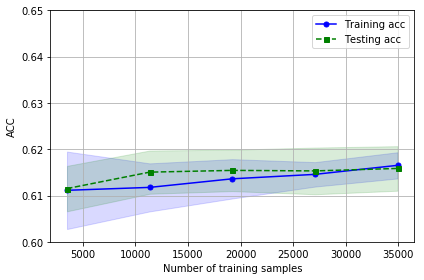

In [60]:
import csv

poly = PolynomialFeatures(degree=3)
poly.fit(X_train_select)
X_train_select_poly = poly.transform(X_train_select)

sc = StandardScaler()
sc.fit(X_train_select_poly)
X_train_select_poly_std = sc.transform(X_train_select_poly)


lr_Ridge = Ridge(alpha=10)
lr_Ridge.fit(X_train_select_poly_std, y_train)
###plot learning curve
train_sizes, train_scores, test_scores = learning_curve(estimator=lr_Ridge, X=X_train_select_poly_std, y=y_train,scoring=ACC)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.plot(train_sizes, train_mean,
    color='blue', marker='o',
    markersize=5,
    label='Training acc')
plt.fill_between(train_sizes,
    train_mean+train_std,
    train_mean-train_std,
    alpha=0.15, color='blue')
    
plt.plot(train_sizes, test_mean,
    color='green', linestyle='--',
    marker='s', markersize=5,
    label='Testing acc')
plt.fill_between(train_sizes,
    test_mean+test_std,
    test_mean-test_std,
    alpha=0.15, color='green')
    
###    

plt.grid()
plt.xlabel('Number of training samples')
plt.ylabel('ACC')
plt.legend(loc='upper right')
plt.ylim([0.6, 0.65])
plt.tight_layout()
plt.savefig('./output/fig-learning-curve-.png' , dpi=300)
plt.show()





X_test = X_test[:,idxs[0]]
X_test = poly.transform(X_test)
X_test_std = sc.transform(X_test)

y_pred = lr_Ridge.predict(X_test_std)

#print(y_pred)

for i in range(y_pred.shape[0]):
    if(y_pred[i]>0.5):
        y_pred[i] = 1
    else:
        y_pred[i] = 0
#print(y_pred)



with open('Lab05_107062616.csv', 'w', newline='') as csvfile:
    writer = csv.writer(csvfile)

  # 寫入二維表格
    writer.writerows(y_pred)



此次作業我分別用了 RandomForestClassifier 一開始看了label後覺得這是屬於分類問題，所以第一個想到要嘗試的就是之前學過的分類器。
但結果發現training accuary幾乎接近1而testing acurracy 大概只有5成多左右，明顯是overfitting了。而這次lab談的是各種regression，
我就上網google查詢regression要如何做分類。這幾堂課下來，我的認知是regression 是找一條回歸線，但要怎麼去做分類啊?
找到的是這篇https://discuss.analyticsvidhya.com/t/using-linear-regression-for-a-classification-problem/9848/2
文中提到將linear regressrion應用在分類並不是一個荒謬的想法，而logistic regression或其他分類方法優於linear regressrion。
是可以應用linear regressrion進行分類那就設定通過一個threshold。我就使用0.5作為分類的threshold。後來我就利用這次lab和之前lab所教的 Polynomial linear regressrion, 
lasso regressrion,ridge regressrion。試過各種a值發現a = 1和polynomial feature degree= 3效果不錯，最後結果是ridge的成果最好(valid_accuracy最高)，
learning curve看起來也沒有overfitting。
作業上半部是沒挑feature做出來的結果，作業下半部是用lasso挑出column 2,5,7 三個TOP feature 做一些處理後做出來得結果，learning curve沒有overfitting，
至於training error 高於 testing error的可能原因也許是testing set剛好較fit此model。


